In [9]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import FinanceDataReader as fdr
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import numpy as np
#import fix_yahoo_finance
import scipy as sp
from scipy.optimize import minimize
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import probplot
from scipy import stats
import datetime


In [10]:



krx=fdr.StockListing('KRX')

code_df=krx.loc[:,['Name','Symbol']]
code_df

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
6662,흥국화재2우B,000547
6663,흥국화재우,000545
6664,흥아해운,003280
6665,희림,037440


In [18]:
# In[169]:



def get_code(df, name):
    share_code = df.query("Name==@name")['Symbol'].to_string(index=False)
    print(share_code,'code')
    
    #share_code=code.split('.')[0]
    if(share_code=='Series([], )' ):
        print('serial')
        return
    #print('code', share_code)
    return share_code


# 차트데이터를 가져올 기간과 페어 주식 입력

# In[122]:


start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)


# In[174]:


def compare_share(pairs):
    stock1 = get_code(code_df, pairs[0])
    stock2 = get_code(code_df, pairs[1])
    if(stock1==None or stock2==None):
        return
    chart_data1 = fdr.DataReader(stock1,start, end).fillna(0)
    chart_data2 = fdr.DataReader(stock2,start, end).fillna(0)
    chart_data_1 = chart_data1.iloc[:,[5]]
    chart_data_2 = chart_data2.iloc[:,[5]]
    change_column_name(chart_data_1,chart_data_2)
    print(pairs[0],pairs[1])


# 수정종가 데이터만 추출하기

# In[6]:





# 페어 주식 컬럼명을 A,B로 변경

# In[7]:


def change_column_name(chart_data_1,chart_data_2):
    chart = pd.concat([chart_data_1,chart_data_2],axis=1)
    chart.columns = ['A','B']
    fig, ax = plt.subplots(figsize=(12,5))
    ax.grid(True)
    plt.plot(chart)
    plt.legend(['A', 'B'])


# A, B 수정종가를 상대주가로 변환

# In[ ]:


    p1 = (chart['A']-chart.mean(axis=0)['A'])/chart.std(axis=0)['A']
    p2 = (chart['B']-chart.mean(axis=0)['B'])/chart.std(axis=0)['B']


    # In[9]:


    #상대주가를 데이터프레임으로 만들기


    # In[10]:


    p11 = pd.DataFrame(p1)
    p22 = pd.DataFrame(p2)
    result = pd.concat([p11,p22],axis=1)
    result.columns = ['Ar','Br']


    # In[11]:


    fig, ax = plt.subplots(figsize=(12,5))
    ax.grid(True)
    plt.plot(p1,color = 'green', label='relative price of A')
    plt.plot(p2,color = 'purple', label='relative price of B')
    plt.legend()


    # 스프레드 정의, 1*시그마 정의

    # In[12]:


    r = p1-p2
    P = 2*r.std()


    # In[13]:


    result['spread'] = result['Ar']-result['Br']
    result


    # P값을 통해 정상성 판별하기

    # In[14]:


    from statsmodels.tsa.stattools import adfuller
    x=r.dropna()
    resultX = adfuller(x)
    print('adf:',resultX[0])
    print('pvalue:',resultX[1])
    if resultX[1]<0.05:
        print("data is stationary")
    else:
        print("data is not stationary")


    # In[15]:


    plt.hist(r,bins=100,density=True,alpha=0.5,histtype='stepfilled')
    print('2*sigma = ',round(2*r.std(),4))
    plt.axvline(x=round(2*r.std(),4), color='r', linestyle='--', linewidth=3)
    plt.axvline(x=-round(2*r.std(),4), color='r', linestyle='--', linewidth=3)


    # 위 히스토그램이 정규분포를 보이는지 판별하는 코드

    # In[16]:


    # In[17]:



    # In[18]:


    result1 = pd.concat([chart,result],axis=1)


    # In[19]:


    sm = result1.mean()['spread']
    result['residual'] = result['spread']-sm
    result


    # In[20]:


    r1 = pd.DataFrame(result['residual'][0:-2])
    r2 = pd.DataFrame(result['residual'][1:-1])


    # In[21]:


    
    # In[23]:


    rd = pd.DataFrame(r)


    # CC 추정하기

    # In[24]:


    cov = np.cov(result['Ar'],result['Br'])
    var = np.var(result['Br'])
    CC = cov[1][0]/var
    print(CC)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
088350 code
000370 code
adf: -6.7764017347069805
pvalue: 2.5641864611485063e-09
data is stationary
2*sigma =  1.6851
<class 'module'> type!


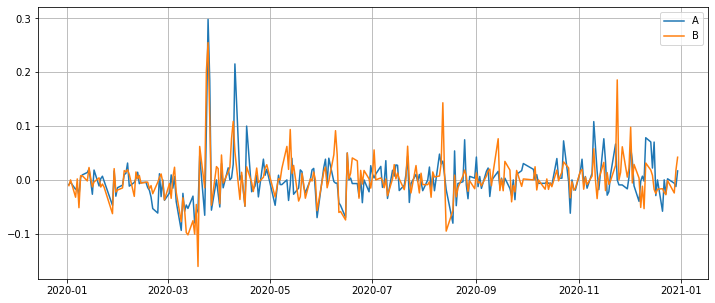

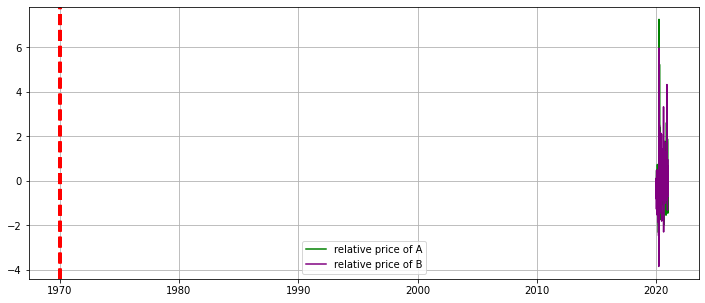

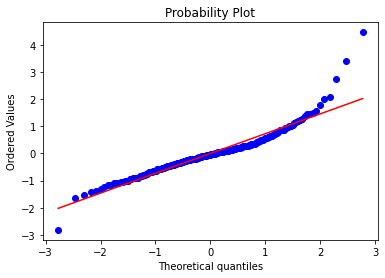

Not Normal Distribution


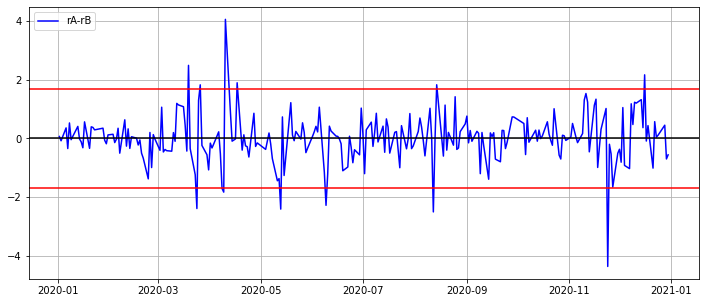

0.6476743316981145
한화생명 한화손해보험
088350 code
000880 code
adf: -14.464125345301765
pvalue: 6.7710113474689e-27
data is stationary
2*sigma =  2.1343
<class 'module'> type!


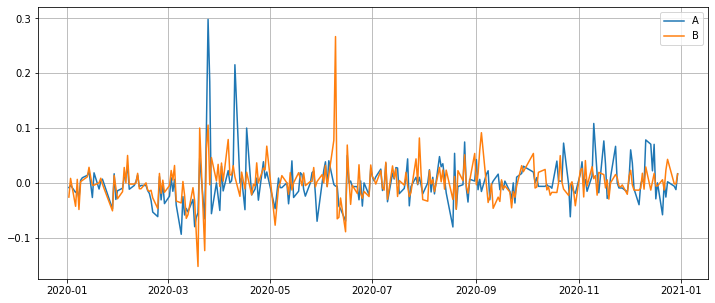

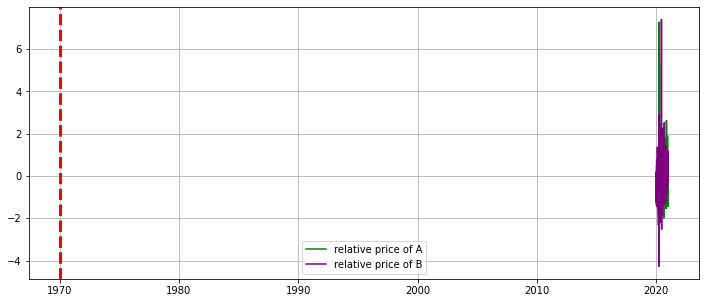

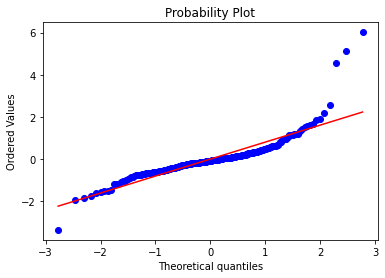

Not Normal Distribution


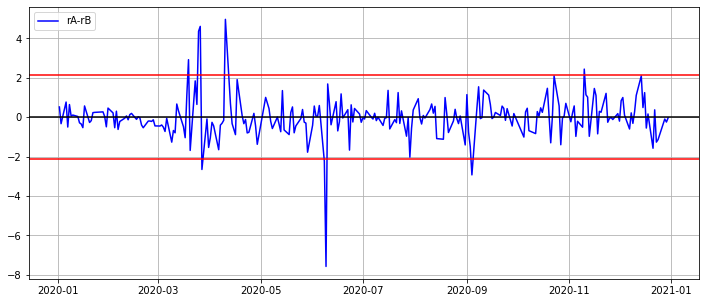

0.43234960793450317
한화생명 한화
088350 code
003530 code
adf: -16.77433804777674
pvalue: 1.2793233733329843e-29
data is stationary
2*sigma =  1.72
<class 'module'> type!


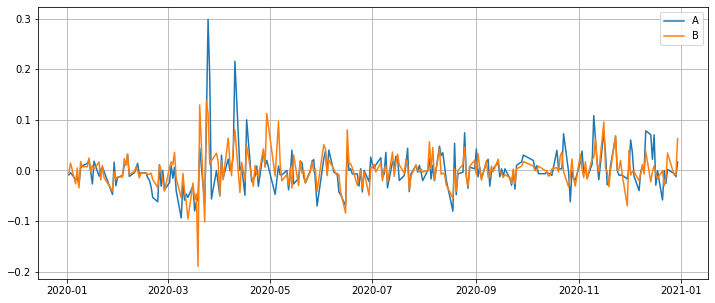

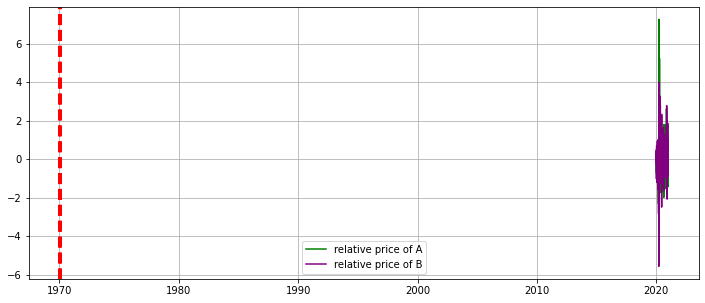

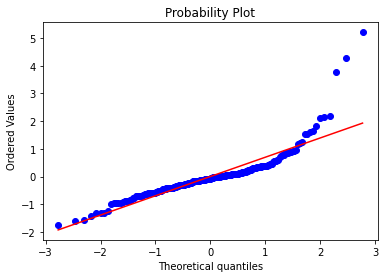

Not Normal Distribution


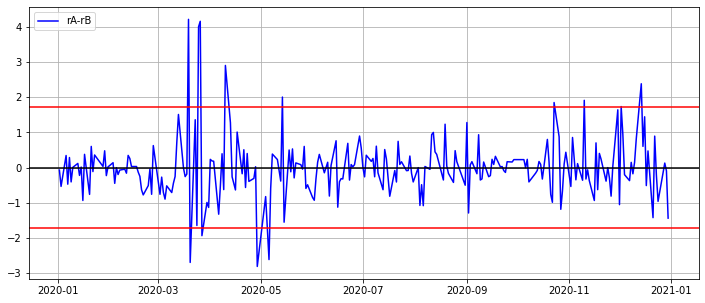

0.6327379770674252
한화생명 한화투자증권
088350 code
009830 code
adf: -6.849277417957218
pvalue: 1.7107434274960807e-09
data is stationary
2*sigma =  2.1738
<class 'module'> type!


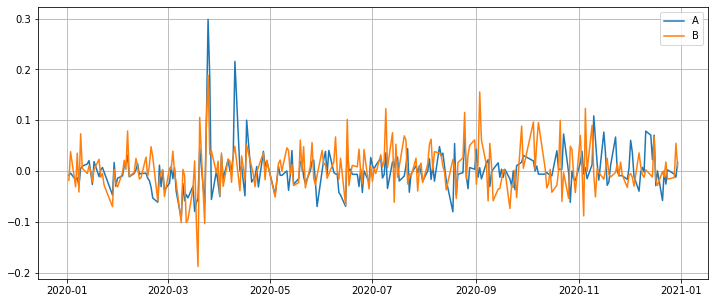

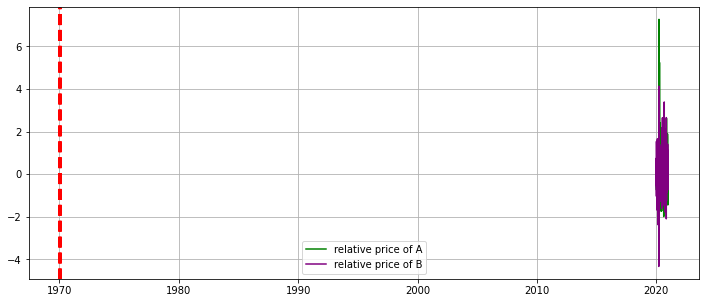

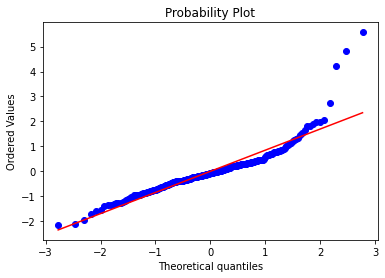

Not Normal Distribution


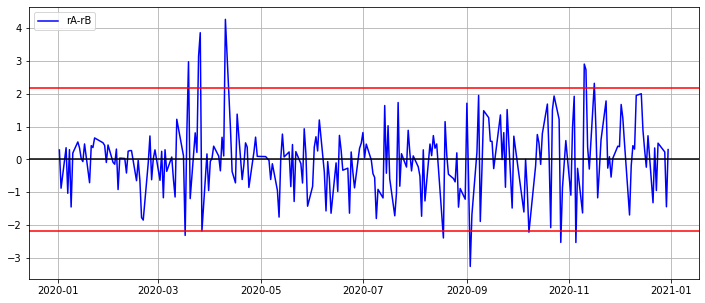

0.4109992440424997
한화생명 한화솔루션
088350 code
012450 code
adf: -16.029706897571195
pvalue: 6.076236689229504e-29
data is stationary
2*sigma =  2.0104
<class 'module'> type!


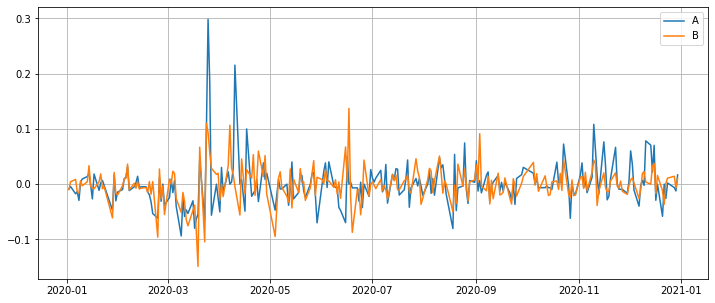

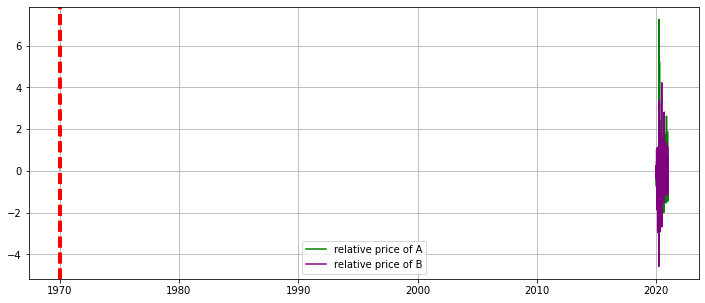

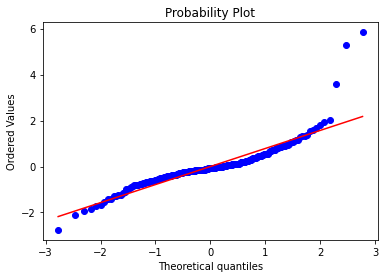

Not Normal Distribution


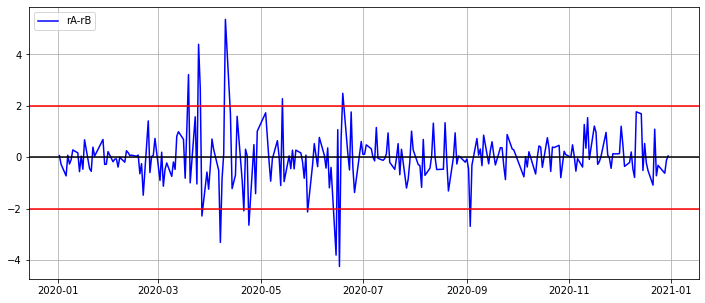

0.4967921254059863
한화생명 한화에어로스페이스
088350 code
272210 code
adf: -10.308527720196663
pvalue: 3.2308809815393085e-18
data is stationary
2*sigma =  2.2314
<class 'module'> type!


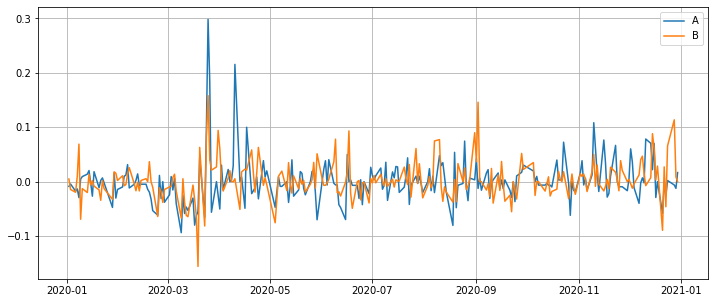

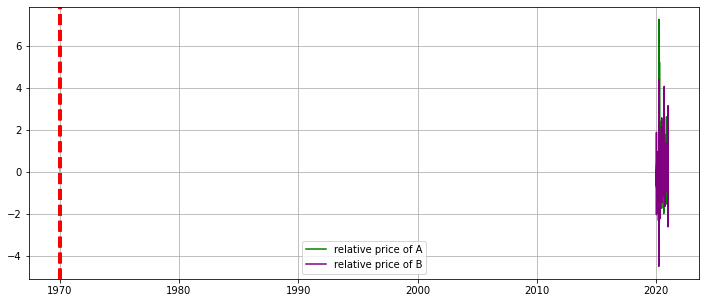

KeyboardInterrupt: 

In [19]:

with open('group_stock_file.txt',"r",encoding="cp949") as temp:
    col_index=[len(l.split(","))for l in temp.readlines()]
    
column_names = [i for i in range(0, max(col_index))]


# In[43]:


data=pd.read_csv('group_stock_file.txt',sep=',',engine='python',encoding="cp949",names=column_names)


# In[44]:


data.head()


# In[45]:


data.shape


# In[46]:


for i in data:
    print(i)


# In[47]:


from itertools import combinations
items=[]
stocks=[]


# In[175]:


for i in data:
    for j in range(0,20):
        if(data[j][i]==None):
            continue
        items.append(data[j][i])
        #print(i,data[j][i])
    #print(items)
    p=list(combinations(items,2))
   # print(p)
    stocks.append(p)
    items=[]
    i=0
    while i<len(p):
        #print(p[i])
        compare_share(p[i])
        i=i+1


# In[73]:

In [ ]:
print(stocks)